# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [5]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('./cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [7]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Randy\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### Scatter Plot [Excess Rate of Readmission  V.S.  Number of Discharges]

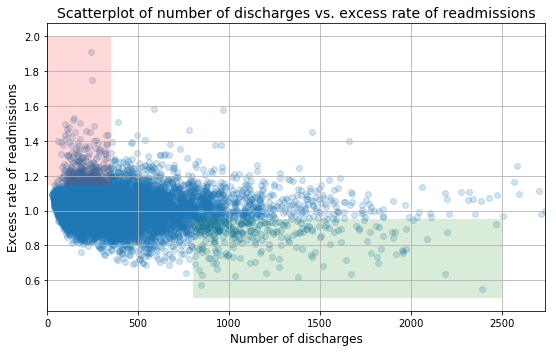

In [8]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

### Check Null Columns:

In [9]:
hospital_read_df.isnull().any()

Hospital Name                 False
Provider Number               False
State                         False
Measure Name                  False
Number of Discharges          False
Footnote                       True
Excess Readmission Ratio       True
Predicted Readmission Rate     True
Expected Readmission Rate      True
Number of Readmissions         True
Start Date                    False
End Date                      False
dtype: bool

In [10]:
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


### Examine Column Type:

In [40]:
hospital_read_df.dtypes

Hospital Name                  object
Provider Number                 int64
State                          object
Measure Name                   object
Number of Discharges           object
Footnote                      float64
Excess Readmission Ratio      float64
Predicted Readmission Rate    float64
Expected Readmission Rate     float64
Number of Readmissions        float64
Start Date                     object
End Date                       object
dtype: object

## Examine Number of Discharges:
Since the number of discharges column is a string, let's convert it to a numeric so we can examine in more detail.

In [43]:
# Convert 'Number of Discharges' to a numeric type
hospital_read_df['Number of Discharges'] = pd.to_numeric(hospital_read_df['Number of Discharges'], errors='coerce')

In [42]:
hospital_read_df['Number of Discharges'].describe()

count    11578.000000
mean       362.909397
std        309.176945
min          0.000000
25%        157.000000
50%        280.000000
75%        472.750000
max       6793.000000
Name: Number of Discharges, dtype: float64

In [44]:
# Examine number of discharges by state
hospital_read_df.groupby('State')['Number of Discharges'].mean().sort_values()

State
HI    190.351351
AK    191.909091
WY    201.333333
NM    205.064103
MN    244.951049
OR    253.537037
LA    269.139442
CO    270.776923
UT    271.433962
WI    274.020833
KS    279.986667
NV    280.482353
MT    282.155556
OK    283.650224
CA    290.167373
MS    296.760417
ID    301.200000
AZ    316.459330
ME    317.185714
GA    320.164804
TX    323.316143
AL    325.963370
AR    336.023529
SD    339.372093
RI    346.650000
DC    346.724138
PA    346.764599
WA    353.737968
NE    358.506173
OH    363.375770
SC    365.717822
IA    368.591241
WV    369.064220
NY    374.969595
TN    375.915625
NH    379.224138
VT    380.571429
MO    386.606498
IN    387.098726
VA    404.900332
IL    407.261993
KY    408.008097
ND    417.793103
MD    445.801020
FL    455.032578
CT    458.214286
MA    464.557377
NC    469.821752
MI    478.413699
NJ    536.865248
DE    711.370370
Name: Number of Discharges, dtype: float64

## Examine Excess Readmission Ratio:

In [45]:
hospital_read_df['Excess Readmission Ratio'].describe()

count    13731.000000
mean         1.002582
std          0.091088
min          0.549500
25%          0.949500
50%          0.997100
75%          1.052350
max          1.909500
Name: Excess Readmission Ratio, dtype: float64

In [57]:
x = hospital_read_df.groupby('State')['Excess Readmission Ratio'].mean()
len(x[x < 1])

27

In [28]:
# Examine readmission ratio by state
hospital_read_df.groupby('State')['Excess Readmission Ratio'].mean().sort_values()

State
MT    0.913930
ND    0.921861
SD    0.922789
ID    0.922961
NE    0.934751
VT    0.942652
OR    0.945146
ME    0.953559
UT    0.954942
CO    0.955072
NH    0.956303
KS    0.962224
WI    0.964171
IA    0.964831
WA    0.971416
DE    0.972963
HI    0.973428
NM    0.974037
WY    0.980867
MN    0.981015
IN    0.984852
AK    0.985732
TX    0.987238
CA    0.992583
MI    0.994360
NC    0.997043
AZ    0.997050
SC    1.000249
OK    1.001588
GA    1.002491
PA    1.008025
MO    1.008581
FL    1.009378
RI    1.009747
LA    1.010298
TN    1.015008
AL    1.015037
OH    1.016102
CT    1.021630
NV    1.025363
AR    1.026488
MS    1.027942
VA    1.028833
IL    1.029562
MA    1.029885
NY    1.036996
KY    1.040027
MD    1.041045
WV    1.046258
NJ    1.050237
DC    1.085581
Name: Excess Readmission Ratio, dtype: float64

### Columns and Rows:
There is 16860 observations/facilities and 12 features

In [12]:
hospital_read_df.shape

(16860, 12)

### Missing Data:
There is about 18.56% Missing Values in the data set

In [17]:
hospital_read_df['Predicted Readmission Rate'].isnull().value_counts()

False    13731
True      3129
Name: Predicted Readmission Rate, dtype: int64

In [18]:
hospital_read_df['Expected Readmission Rate'].isnull().value_counts()

False    13731
True      3129
Name: Expected Readmission Rate, dtype: int64

In [15]:
hospital_read_df['Excess Readmission Ratio'].isnull().value_counts()

False    13731
True      3129
Name: Excess Readmission Ratio, dtype: int64

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

## A. Do you agree with the above analysis and recommendations? Why or why not?

Even though they're hypothesis/analysis does look meaningful, I do not agree because they did not provide any statistical evidences to back up their claim. You must always be skeptical and question every statement.

## B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

### 1. Setup an appropriate hypothesis test:

**Null Hypothesis (H0):** There is no statistical importance between mean hospital excess readmission rates and number of discharges (< 100 and > 1000)

**Alternative Hypothesis (HA):** There is statistical importance between mean hospital excess readmission rates and number of discharges (< 100 and > 1000)

### Compute and report the observed significance value (or p-value):

In [65]:
# Split data into two groups: 
# Group 1 - Hospitals with Number of Discharge < 100
# Group 2 - Hospitals with Number of Discharge > 1000

# Group 1
df100 = hospital_read_df[(hospital_read_df['Number of Discharges'] < 100) & (hospital_read_df['Number of Discharges'] > 0)]

# Group 2
df1000 = hospital_read_df[(hospital_read_df['Number of Discharges'] > 1000)]

In [66]:
# Check to see if the sample size is "large" enough to be normally distributed
x = len(df100)
x2 = len(df1000)

print (x,x2)

1188 463


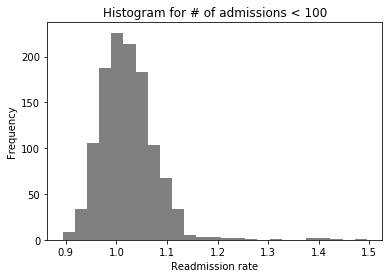

In [67]:
# Graph Group 1
df100["Excess Readmission Ratio"].plot(kind='hist',color='0.5', bins = 25, title = 'Histogram for # of admissions < 100').set_xlabel('Readmission rate')
st_100=round((df100["Excess Readmission Ratio"]).std(),4)

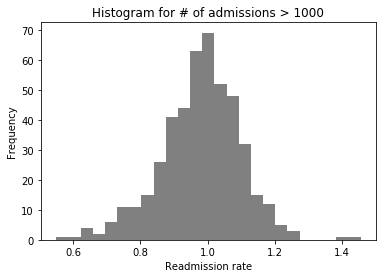

In [71]:
# Graph Group 2
df1000["Excess Readmission Ratio"].plot(kind='hist',color='0.5', bins = 25, title = 'Histogram for # of admissions > 1000').set_xlabel('Readmission rate')
st_1000=round((df1000["Excess Readmission Ratio"]).std(),4)

In [92]:
import math
import scipy.stats as st
# Get the variables for Test Statistics
df100_ratio_mean = df100['Excess Readmission Ratio'].mean()
df1000_ratio_mean = df1000['Excess Readmission Ratio'].mean()

# Get the mean difference
meanD = df100_ratio_mean - df1000_ratio_mean

# Get the standard deviation of each group ()
df100_ratio_std = df100['Excess Readmission Ratio'].std()
df1000_ratio_std = df1000['Excess Readmission Ratio'].std()

# Get the size of each group (n)
df100_ratio_size = len(df100)
df1000_ratio_size = len(df1000)

# Calculate Standard Error (SE) 
SE = math.sqrt(((df100_ratio_std*df100_ratio_std)/df100_ratio_size)+((df1000_ratio_std*df1000_ratio_std)/df1000_ratio_size) )

# Calculate Z-Score
z_score = meanD / SE
z_score

7.60174241850014

In [93]:
# Calculate P-Value
p_values = st.norm.sf(abs(z_score))
p_values

1.4608491839088948e-14

### P-Value & Z-Score Report
The P-Value that was computed was about 1.46e-14, which is really low. Because of this, we can **reject** the null hypothesis and support the alternative hypothesis. Also, a high Z-Score should also be taken into consideration to reject the null hypothesis because it's far away from the mean of 0.

### Original Graph
The good thing about this graph is that it shows a good amount of information for the distrubtion of hospitals with Number of Discharges V.S. Excess Rate of Readmission. One bad thing about the graph is that it's kind of hard to see some correlation between the two variables.

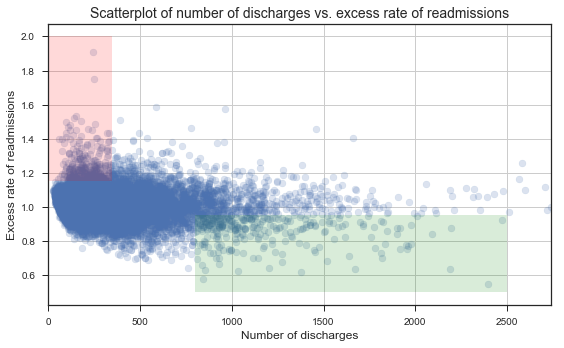

In [140]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

### Alternate Graph
Using Seaborn's joinplot graph allows extra customization. On top we can see that the graph is right skewed and the regression line has a slight negative slope, meaning that as the number of discharges increase the excess readmission ratio decreases.

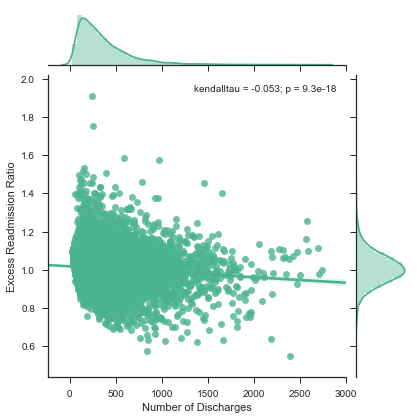

In [139]:
import numpy as np
from scipy.stats import kendalltau
import seaborn as sns
sns.set(style="ticks")
dfX = hospital_read_df[(hospital_read_df['Number of Discharges'] < 3000)]
sns.jointplot(dfX['Number of Discharges'], dfX['Excess Readmission Ratio'], kind="reg", dropna = True, stat_func=kendalltau, color="#4CB391")

### Conclusion
Based on the statistical analysis, there seems to be some significant value between the Number of Discharges and Excess Readmission Ratio of hospitals. The high Z-Score and low P-value are good indicators to reject the null hypothesis. But this does not neccessarily mean that there is practical significance. We would have to conduct more experiments or maybe collect more data about the hospitals in order to come up with a more accurate finding. I would recommend to gather more variables from the database that could have more impact on determining future patient readmission such as their ICD codes, general health, types of disesaes, distance from home, length of stay, and etc. 